In [57]:
%load_ext autoreload
%autoreload 2
import numpy as np
from main.alpaca import *
from main.datagen import *
from main.dataViz import *
from hand_plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
cfg_filename = 'configs/trajectory-config.yml'
with open(cfg_filename,'r') as ymlfile:
    config = yaml.load(ymlfile)

In [59]:
config

{'data_horizon': 10,
 'test_horizon': 10,
 'row_length': 20,
 'num_class_samples': 50,
 'x_dim_time': 1,
 'y_dim_time': 63,
 'x_dim_space': 567,
 'y_dim_space': 63,
 'x_dim': 1,
 'y_dim': 1,
 'sigma_eps': 0.005,
 'lr': 0.0001,
 'nn_layers': [256, 256, 256, 256],
 'activation': 'tanh',
 'num_input_points': 10,
 'num_hand_points': 21,
 'input_dim': 3,
 'shuffle': False,
 'action': 'open_wallet',
 'formulation': 'space'}

In [60]:
num_input_points = config['num_input_points']
num_hand_points = config['num_hand_points']
input_dim = config['input_dim']
shuffle = config['shuffle']
row_length = config['row_length']
action_label = config['action']
train_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/train/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)
val_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/valid/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)
test_dataset = TrajectoriesDataset('/cvgl2/u/rsluo/datasets/First_Person_Action_Benchmark/Hand_pose_annotation_v1/test/', action_label, num_input_points, num_hand_points, input_dim, row_length, shuffle)

len_train_dataset = train_dataset.__len__()
num_samples_train = len_train_dataset
Y1, X1, init1 = train_dataset.sample_trajectories(num_samples_train)
Y2, X2, init2 = train_dataset.sample_trajectories(num_samples_train)
print('Y1 size', Y1.shape)
print('X1 size', X1.shape)
print('init1 size', init1.shape)
print('Y2 size', Y2.shape)
print('X2 size', X2.shape)
print('init2 size', init2.shape)
print()

len_val_dataset = val_dataset.__len__()
num_samples_val = len_val_dataset
Y_val1, X_val1, init_val1 = val_dataset.sample_trajectories(num_samples_val)
Y_val2, X_val2, init_val2 = val_dataset.sample_trajectories(num_samples_val)
print('Y_val1 size', Y_val1.shape)
print('X_val1 size', X_val1.shape)
print('init_val1 size', init_val1.shape)
print('Y_val2 size', Y_val2.shape)
print('X_val2 size', X_val2.shape)
print('init_val2 size', init_val2.shape)
print()

len_test_dataset = test_dataset.__len__()
num_samples_test = len_test_dataset
Y_test1, X_test1, init_test1 = test_dataset.sample_trajectories(num_samples_test)
Y_test2, X_test2, init_test2 = test_dataset.sample_trajectories(num_samples_test)
print('Y_test1 size', Y_test1.shape)
print('X_test1 size', X_test1.shape)
print('init_test1 size', init_test1.shape)
print('Y_test2 size', Y_test2.shape)
print('X_test2 size', X_test2.shape)
print('init_test2 size', init_test2.shape)

noise1 = 0.1
noise2 = 0.3
noise3 = 0.5

TRAJ_LENGTH 26
TRAJ_LENGTH 22
TRAJ_LENGTH 53
TRAJ_LENGTH 24
TRAJ_LENGTH 27
TRAJ_LENGTH 35
TRAJ_LENGTH 67
TRAJ_LENGTH 27
TRAJ_LENGTH 39
TRAJ_LENGTH 40
TRAJ_LENGTH 27
TRAJ_LENGTH 35
TRAJ_LENGTH 27
TRAJ_LENGTH 22
TRAJ_LENGTH 39
TRAJ_LENGTH 24
TRAJ_LENGTH 67
TRAJ_LENGTH 40
TRAJ_LENGTH 53
TRAJ_LENGTH 26
Y1 size (7, 20, 63)
X1 size (7, 20, 567)
init1 size (7, 20, 63)
Y2 size (7, 20, 63)
X2 size (7, 20, 567)
init2 size (7, 20, 63)

TRAJ_LENGTH 26
TRAJ_LENGTH 24
TRAJ_LENGTH 33
TRAJ_LENGTH 27
TRAJ_LENGTH 28
TRAJ_LENGTH 28
TRAJ_LENGTH 33
TRAJ_LENGTH 24
TRAJ_LENGTH 27
TRAJ_LENGTH 26
Y_val1 size (1, 20, 63)
X_val1 size (1, 20, 567)
init_val1 size (1, 20, 63)
Y_val2 size (1, 20, 63)
X_val2 size (1, 20, 567)
init_val2 size (1, 20, 63)

TRAJ_LENGTH 40
TRAJ_LENGTH 33
TRAJ_LENGTH 27
TRAJ_LENGTH 27
TRAJ_LENGTH 33
TRAJ_LENGTH 40
Y_test1 size (2, 20, 63)
X_test1 size (2, 20, 567)
init_test1 size (2, 20, 63)
Y_test2 size (2, 20, 63)
X_test2 size (2, 20, 567)
init_test2 size (2, 20, 63)


In [80]:
g1 = tf.Graph()
sess1 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g1)
# sess1 = tf_debug.TensorBoardDebugWrapperSession(sess1, 'capri14.stanford.edu:6064')
agent1 = ALPaCA(config)
agent1.sigma_scalar = noise1
agent1.construct_model(sess1, g1)
agent1.train(sess1, Y1, X1, Y_val1, X_val1, 200, plot_loss=True)

made it to basis_lstm
updates_so_far 0
inp [<tf.Tensor 'model/map/while/ExpandDims:0' shape=(1, 567) dtype=float32>, <tf.Tensor 'model/map/while/ExpandDims_1:0' shape=(1, 567) dtype=float32>, <tf.Tensor 'model/map/while/ExpandDims_2:0' shape=(1, 567) dtype=float32>]
made it to pred_f
ux dim pred_f (?, 567)
made it to basis_lstm
updates_so_far 0
inp [<tf.Tensor 'model/map_1/while/ExpandDims:0' shape=(1, 567) dtype=float32>, <tf.Tensor 'model/map_1/while/ExpandDims_1:0' shape=(1, 567) dtype=float32>, <tf.Tensor 'model/map_1/while/ExpandDims_2:0' shape=(1, 567) dtype=float32>]
made it to basis_lstm
updates_so_far 0
inp [<tf.Tensor 'model/map_1/while/ExpandDims_3:0' shape=(1, 567) dtype=float32>, <tf.Tensor 'model/map_1/while/ExpandDims_4:0' shape=(1, 567) dtype=float32>, <tf.Tensor 'model/map_1/while/ExpandDims_5:0' shape=(1, 567) dtype=float32>]
made it to loss_f
num_updates [ 1  4  9  5  5  9  2 10  1  6  0  3  8  2  0 10  7  2  4  1  5  1  2  1
  7  7  8  2  0  6  4  8  4  9  6  1  8  

InvalidArgumentError: Input shape axis 0 must equal 3, got shape [1,567]
	 [[Node: model/map_1/while/unstack = Unpack[T=DT_FLOAT, axis=0, num=3, _device="/job:localhost/replica:0/task:0/device:GPU:0"](model/map_1/while/strided_slice)]]
	 [[Node: model/Mean_2/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_150_model/Mean_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'model/map_1/while/unstack', defined at:
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 499, in start
    self.io_loop.start()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/asyncio/base_events.py", line 1432, in _run_once
    handle._run()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/ioloop.py", line 759, in _run_callback
    ret = callback()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/gen.py", line 1199, in inner
    self.run()
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/gen.py", line 1113, in run
    yielded = self.gen.send(value)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 346, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/gen.py", line 315, in wrapper
    yielded = next(result)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 259, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/gen.py", line 315, in wrapper
    yielded = next(result)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 513, in execute_request
    user_expressions, allow_stdin,
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tornado/gen.py", line 315, in wrapper
    yielded = next(result)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2817, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2843, in _run_cell
    return runner(coro)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3018, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3183, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3265, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-80-13e7a7d82def>", line 6, in <module>
    agent1.construct_model(sess1, g1)
  File "/cvgl2/u/rsluo/hand_trajectory/ALPaCA2/main/alpaca.py", line 77, in construct_model
    dtype = (tf.float32, tf.float32, tf.float32) )
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/functional_ops.py", line 423, in map_fn
    swap_memory=swap_memory)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 3224, in while_loop
    result = loop_context.BuildLoop(cond, body, loop_vars, shape_invariants)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2956, in BuildLoop
    pred, body, original_loop_vars, loop_vars, shape_invariants)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/control_flow_ops.py", line 2893, in _BuildLoop
    body_result = body(*packed_vars_for_body)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/functional_ops.py", line 413, in compute
    packed_fn_values = fn(packed_values)
  File "/cvgl2/u/rsluo/hand_trajectory/ALPaCA2/main/alpaca.py", line 74, in <lambda>
    pred_fn = lambda inp: self.pred_f(*inp)
  File "/cvgl2/u/rsluo/hand_trajectory/ALPaCA2/main/alpaca.py", line 128, in pred_f
    uPhi = self.basis_lstm(ux)
  File "/cvgl2/u/rsluo/hand_trajectory/ALPaCA2/main/alpaca.py", line 381, in basis_lstm
    inp = tf.unstack(x, num=self.updates_so_far+3)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1092, in unstack
    return gen_array_ops.unpack(value, num=num, axis=axis, name=name)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 9054, in unpack
    "Unpack", value=value, num=num, axis=axis, name=name)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): Input shape axis 0 must equal 3, got shape [1,567]
	 [[Node: model/map_1/while/unstack = Unpack[T=DT_FLOAT, axis=0, num=3, _device="/job:localhost/replica:0/task:0/device:GPU:0"](model/map_1/while/strided_slice)]]
	 [[Node: model/Mean_2/_25 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_150_model/Mean_2", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
rmse = agent1.test_rmse(sess1, X1, Y1)
print('Train RMSE:', rmse)

rmse = agent1.test_rmse(sess1, X_test1, Y_test1)
print('Test RMSE:', rmse)

In [ ]:
# Testing plotting code
print(Y_test1.shape)
print(X_test1.shape)
print(init_test1.shape)

plot_hand_points(init_test1[0, 0, :])
plot_hand_points(init_test1[0, 1, :])
hand1 = np.squeeze(X_test1[0, 0, 0:63]) + init_test1[0, 0, :]
hand2 = hand1 + np.squeeze(X_test1[0, 0, 63:126])
plot_two_hands(hand1, hand2, first_hand_label='Ground Truth', second_hand_label='Ground Truth t+1')

In [ ]:
x_test = X_test1[0,:,:];
y_test = Y_test1[0,:,:];
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting 1 next step at a time
for i in range(1, 10):
    ux = x_test[:i, :]
    ux = np.expand_dims(ux, axis=0)
    uy = y_test[:i, :]
    uy = np.expand_dims(uy, axis=0)
    x = x_test[i, :]
    x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos = next_pos + np.squeeze(x[:,:,63*j:63*(j+1)])
        
    pred_hand = next_pos + np.squeeze(y)
    true_hand = next_pos + y_test[i, :]
    plot_two_hands(pred_hand, true_hand, pred_uncertainty=s)

In [ ]:
ux = X_test1[0,0,:]
uy = Y_test1[0,0,:]
ux = np.expand_dims(np.expand_dims(ux, axis=0), axis=0)
uy = np.expand_dims(np.expand_dims(uy, axis=0), axis=0)
x = X_test1[0,1,:]
x = np.expand_dims(np.expand_dims(x, axis=0), axis=0)
print('ux shape', ux.shape)
print('uy shape', uy.shape)
print('x shape', x.shape)

print('X_test1 shape', X_test1.shape)
print('Y_test1 shape', Y_test1.shape)

next_positions = init_test1[0,:,:]
print('next_positions shape', next_positions.shape)

# Predicting farther into the future
for i in range(1, 10):
    y, s = agent1.test(sess1, ux, uy, x) # y is the predicted next position
    
    next_pos_pred = next_positions[i,:]
    for j in range(num_input_points - 1):
        next_pos_pred = next_pos_pred + np.squeeze(x[:,:,63*j:63*(j+1)])
    pred_hand = next_pos_pred + np.squeeze(y)
    
    next_pos_true = next_positions[i,:]
    for k in range(num_input_points - 1):
        next_pos_true = next_pos_true + np.squeeze(X_test1[0,i,63*k:63*(k+1)])
    true_hand = next_pos_true + Y_test1[0, i, :]
    
    plot_two_hands(pred_hand, true_hand, pred_uncertainty=s)
    
    ux = np.concatenate((ux, x), axis=1)
    uy = np.concatenate((uy, y), axis=1)
    x = np.concatenate((x[:,:,63:], y), axis=2)

In [5]:
points_per_traj = 30
yy, xx = train_dataset.sample_trajectories_time(num_samples_train, points_per_traj)
# xx = np.expand_dims(xx, axis=2)
yy_val, xx_val = val_dataset.sample_trajectories_time(num_samples_val, points_per_traj)
# xx_val = np.expand_dims(xx_val, axis=2)
yy_test, xx_test = test_dataset.sample_trajectories_time(num_samples_test, points_per_traj)
# xx_test = np.expand_dims(xx_test, axis=2)

print(len(xx))
print(len(yy))
print(len(xx_val))
print(len(yy_val))
print(len(xx_test))
print(len(yy_test))

print(xx[0].shape)
print(yy[0].shape)

# print('xx shape', xx.shape)
# print('yy shape', yy.shape)
# print('xx_val shape', xx_val.shape)
# print('yy_val shape', yy_val.shape)
# print('xx_test shape', xx_test.shape)
# print('yy_test shape', yy_test.shape)

TRAJ_LENGTH 26
TRAJ_LENGTH 53
TRAJ_LENGTH 26
TRAJ_LENGTH 35
TRAJ_LENGTH 35
TRAJ_LENGTH 22
TRAJ_LENGTH 53
TRAJ_LENGTH 53
TRAJ_LENGTH 24
TRAJ_LENGTH 53
TRAJ_LENGTH 24
TRAJ_LENGTH 26
TRAJ_LENGTH 33
TRAJ_LENGTH 26
TRAJ_LENGTH 28
TRAJ_LENGTH 40
TRAJ_LENGTH 33
TRAJ_LENGTH 27
10
10
5
5
3
3
(25, 1)
(25, 63)


inp [<tf.Tensor 'model/map/while/TensorArrayReadV3:0' shape=(?, 1) dtype=float32>]
outputs type <class 'list'>
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 256)
(?, ?, 1)
inp [<tf.Tensor 'model/map_1/while/strided_slice:0' shape=(?, 1) dtype=float32>]
outputs type <class 'list'>
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 256)
inp [<tf.Tensor 'model/map_1/while/TensorArrayReadV3_3:0' shape=(?, 1) dtype=float32>]
outputs type <class 'list'>
<class 'tensorflow.python.framework.ops.Tensor'>
(?, 256)
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 6

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

hola [(25, 63), (52, 63), (25, 63), (34, 63), (34, 63), (21, 63), (52, 63), (52, 63), (23, 63), (52, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63)]
hola [(23, 63), (25, 63), (32, 63), (25, 63), (27, 63)]
hey hey [(10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), (10, 63), 

/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/cvgl2/u/rsluo/anaconda2/envs/python3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


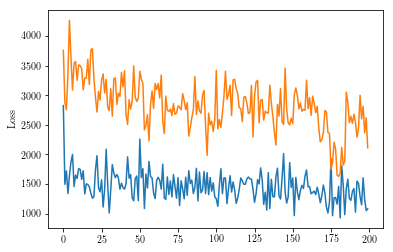

In [6]:
g2 = tf.Graph()
sess2 = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True), graph=g2)
agent2 = ALPaCA(config)
agent2.sigma_scalar = noise2
agent2.construct_model(sess2, g2)
agent2.train(sess2, yy, xx, yy_val, xx_val, 200, plot_loss=True)

In [ ]:
rmse = agent2.test_rmse(sess2, xx, yy)
print('Train RMSE:', rmse)

rmse = agent2.test_rmse(sess2, xx_test, yy_test)
print('Test RMSE:', rmse)

In [ ]:
my_list = []
my_list.append([5])
my_list.append([6,5,4])
my_list.append([7,8,9,10])

In [ ]:
my_list

In [ ]:
my_list[0]

In [ ]:
my_list[0,2]